In [24]:
import sys, os, re, random, warnings, pickle
sys.path.append(os.path.dirname(os.getcwd()))

import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

from config import *
from utils import *
from ssqa import *

sns.set(style="whitegrid", palette="muted")
warnings.filterwarnings("ignore")

In [139]:
rho_df = pd.read_csv(f"{MUT_DATA}/rho_df.csv", index_col = 0).dropna()
cols = ["ind/E",
                                   "ind/sup/DP", "ind/sup/PM", "ind/sup/PM+DP", "ind/sup/E+DP", "ind/sup/E+PM",
                                   "ind/sup/E+DP+PM",
                                   "ind/unsup/DP", "ind/unsup/PM", "ind/unsup/PM+DP", "ind/unsup/E+DP",
                                   "ind/unsup/E+PM", "ind/unsup/E+DP+PM", "dca/E",
                                   "dca/sup/DP", "dca/sup/PM", "dca/sup/PM+DP", "dca/sup/E+DP", "dca/sup/E+PM",
                                   "dca/sup/E+DP+PM",
                                   "dca/unsup/DP", "dca/unsup/PM", "dca/unsup/PM+DP", "dca/unsup/E+DP",
                                   "dca/unsup/E+PM", "dca/unsup/E+DP+PM"
                                   ]

grouper = rho_df.groupby("dataset")
rho_df2 = grouper.first()[["fam","exp","inpdb","size","length"]]
for c in cols:
    rho_df2[c] = grouper.max(c)[c]
rho_df2["best"] = rho_df2[cols[2:]].max(1)
rho_df2 = rho_df2.sort_values("best")
rho_df2 = rho_df2.reset_index()

In [141]:
cols = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#56ae57', 
       '#efb435', '#d3b683', '#c9d179', '#9d0759', "orange", "red"]
random.shuffle(cols)
color = {k:v for k,v in zip(rho_df.fam.unique(), cols)}

In [140]:
names = ["Independant", "Epistatic", "Dot Product", "Dot Product + Independant", "Dot Product + Epistatic",
         "Pattern Matching", "Pattern Matching + Independant", "Pattern Matching + Epistatic",
         "Interpolation", "Pattern Matching + Dot Product + Epistatic"]

In [7]:
names = ["DYR_ECOLI_Shakhnovich2012",
"TRY2_RAT_Ranganathan2009",
"BLAT_ECOLX_Ranganathan2015",

"BLAT_ECOLX_Ostermeier2014",
"PABP_YEAST_Fields2013-doubles",
"POL_HV1N5_Ndungu2014",
"FYN_HUMAN_Davidson2003",
"PABP_YEAST_Fields2013-singles",

"BLAT_ECOLX_Palzkill2012",
"BLAT_ECOLX_LowThroughput2014-averaged",
"RL401_YEAST_Bolon2013",
"BLAT_ECOLX_Tenaillon2013-singles",
"KKA2_KLEPN_Mikkelsen2014",
"GAL4_YEAST_Shendure2015",
"RL401_YEAST_Bolon2014",
"MTH3_HAEAESTABILIZED_Tawfik2015",
"POLG_HCVJF_Sun2014",
"HSP82_YEAST_Bolon2016",
"BG_STRSQ_Abate2015",
"PYP_HALHA_Hoff2010",
"YAP1_HUMAN_Fields2012-singles",
"BRCA1_HUMAN_Fields2015",
"UBE4B_MOUSE_Klevit2013-singles",
]
E = [0.645,0.76, 0.7, 0.705, 0.62, 0.84, 0.69, 0.59, 0.51, 0.87, 0.445, 0.685, 0.61, 0.625, 0.4, 0.68, 0.58, 0.49, 0.64, 0.55, 0.57, 0.56, 0.52]
DPE = [
    0.76, 0.575, 0.805, .8, .76, .74, .62, .75, .73, .725, .72, .67, .69, .68, .705, .665, .663, .675, .64, .635, .635, 0.52, .53  
]
PME = [
    .86, .825, .75, .75, .715, .76, .65, .62, .615, .69, .42, .695, .67, .64, .42, .68, .63, .58, .65, .55, .51, .41, .52 
]
DPPME = [
    .87, .78, .815, .81, .78, .65, .755, .745, .75, .655, .715, .67, .705, .705, .685, .69, .67, .69, .67, .57, .59, .55, .58
]

23

In [264]:
rho_df2

,dataset,fam,exp,inpdb,size,length,ind/E,ind/sup/DP,ind/sup/PM,ind/sup/PM+DP,...,dca/sup/E+DP,dca/sup/E+PM,dca/sup/E+DP+PM,dca/unsup/DP,dca/unsup/PM,dca/unsup/PM+DP,dca/unsup/E+DP,dca/unsup/E+PM,dca/unsup/E+DP+PM,best
0,Bolon2016,HSP82_YEAST,selection_coefficient,1,4104,240,0.427014,0.490312,0.413495,0.492335,...,0.539978,0.538550,0.539987,0.109429,0.051308,0.048450,0.490491,0.483210,0.495992,0.546459
1,Palzkill2012,BLAT_ECOLX,ddG_stat,1,4808,263,0.432401,0.502056,0.531726,0.573089,...,0.502320,0.537039,0.573073,0.031901,0.013940,0.011150,0.031902,0.013940,0.011150,0.573089
2,Fields2012-singles,YAP1_HUMAN,linear,1,319,36,0.571673,0.106838,0.098647,0.109734,...,0.509318,0.526779,0.493854,0.077227,0.063556,0.064402,0.563753,0.565464,0.586669,0.586669
3,Davidson2003,FYN_HUMAN,Tm,1,48,66,0.422830,0.469651,0.363969,0.495977,...,0.595455,0.552121,0.533636,0.517645,0.328727,0.328727,0.636970,0.636970,0.638788,0.638788
4,Abate2015,BG_STRSQ,enrichment,1,2634,501,0.542075,0.305925,0.287551,0.312257,...,0.650145,0.623802,0.648067,0.010069,0.040442,0.040105,0.632091,0.632155,0.632370,0.650145
5,Mikkelsen2014,KKA2_KLEPN,Ami11_avg,1,4398,264,0.370304,0.490946,0.467873,0.530257,...,0.651904,0.645185,0.646402,0.076480,0.074529,0.075062,0.609667,0.610468,0.613055,0.651904
6,Hoff2010,PYP_HALHA,lambda_max,1,43,125,0.438393,0.289574,0.281096,0.356096,...,0.524436,0.545473,0.652368,0.293189,0.340541,0.312910,0.505805,0.485707,0.513264,0.652368
7,Tenaillon2013-singles,BLAT_ECOLX,MIC_score,1,951,263,0.577370,0.204313,0.144317,0.217949,...,0.686118,0.629013,0.668913,0.041314,0.050816,0.051667,0.681206,0.681478,0.680994,0.686118
8,Tawfik2015,MTH3_HAEAESTABILIZED,Wrel_G3,1,1799,330,0.441330,0.406474,0.320014,0.420234,...,0.672672,0.679651,0.637669,0.178905,0.083164,0.078187,0.685232,0.685423,0.687485,0.687485
9,Ostermeier2014,BLAT_ECOLX,linear,1,4611,263,0.612961,0.439735,0.448271,0.485107,...,0.741282,0.728319,0.711991,0.027196,0.022004,0.028024,0.703877,0.704301,0.704192,0.741282


In [69]:
rho_df2.loc[0]

dataset                Hoff2010
fam                   PYP_HALHA
exp                  lambda_max
inpdb                         1
size                         43
length                      125
ind/E                  0.299949
ind/sup/DP             0.372275
ind/sup/PM              0.23344
ind/sup/PM+DP          0.326066
ind/sup/E+DP            0.39318
ind/sup/E+PM           0.370833
ind/sup/E+DP+PM        0.420361
ind/unsup/DP           0.407446
ind/unsup/PM           0.274841
ind/unsup/PM+DP        0.274841
ind/unsup/E+DP         0.311706
ind/unsup/E+PM         0.285457
ind/unsup/E+DP+PM      0.478729
dca/E                  0.536651
dca/sup/DP             0.559262
dca/sup/PM              0.48407
dca/sup/PM+DP          0.494205
dca/sup/E+DP           0.579696
dca/sup/E+PM           0.504693
dca/sup/E+DP+PM        0.615094
dca/unsup/DP           0.479437
dca/unsup/PM           0.314254
dca/unsup/PM+DP        0.322175
dca/unsup/E+DP         0.536651
dca/unsup/E+PM         0.539494
dca/unsu

In [47]:
rho_df2["dca/sup/E+DP+PM"]

0    0.615094
1    0.658632
2    0.629697
3    0.640000
4    0.789906
5    0.857918
6    1.000000
Name: dca/sup/E+DP+PM, dtype: float64

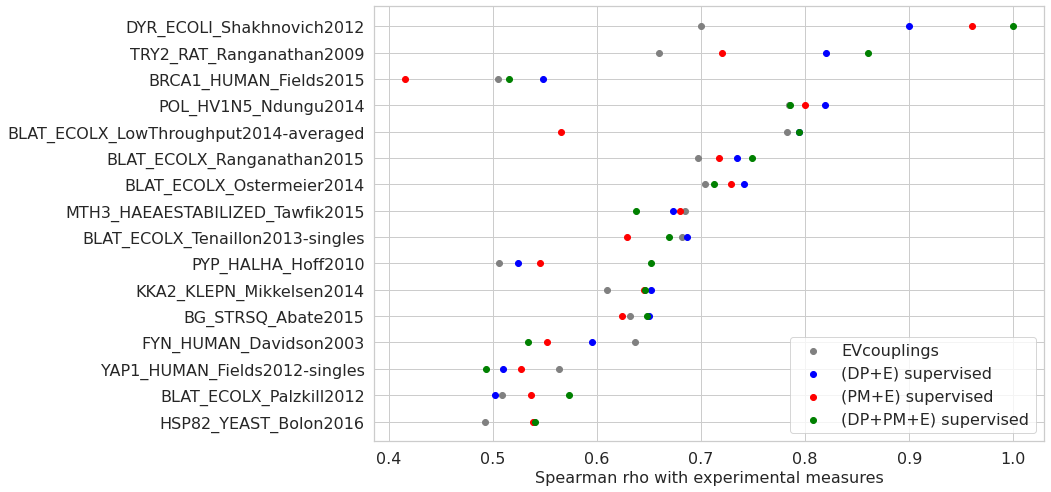

In [265]:
plt.figure(figsize=(12,8))
plt.scatter(rho_df2["dca/E"],rho_df2["dca/E"].index, c = "gray")
plt.scatter(rho_df2["dca/sup/E+DP"],rho_df2["dca/sup/E+DP"].index, c = "blue")
plt.scatter(rho_df2["dca/sup/E+PM"],rho_df2["dca/sup/E+PM"].index, c = "red")
plt.scatter(rho_df2["dca/sup/E+DP+PM"],rho_df2["dca/sup/E+DP+PM"].index, c="green")

plt.legend(["EVcouplings", "(DP+E) supervised", "(PM+E) supervised", "(DP+PM+E) supervised"], loc = 4, fontsize = 16)
plt.yticks(rho_df2.index, [f"{fam}_{name_dataset}" for fam, name_dataset in zip(rho_df2.fam.values,rho_df2.dataset.values)], rotation = 0)
plt.xlabel("Spearman rho with experimental measures",fontsize = 16)
plt.yticks(fontsize = 16)

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

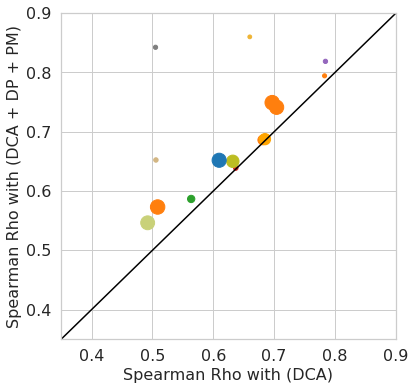

In [266]:
plt.figure(figsize = (6,6))
plt.plot([0,1], c="black")
plt.scatter(rho_df2["dca/E"], rho_df2["best"], c = rho_df2.fam.apply(lambda x : color[x]).values, 
            s = 3*np.sqrt(rho_df2["size"]), 
            marker = "o")
plt.xlim(0.35, 0.9)
plt.ylim(0.35, 0.9)
plt.xticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9], [0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
plt.yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9], [0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.xlabel("Spearman Rho with (DCA)", fontsize = 16)
plt.ylabel("Spearman Rho with (DCA + DP + PM)", fontsize = 16)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.show()

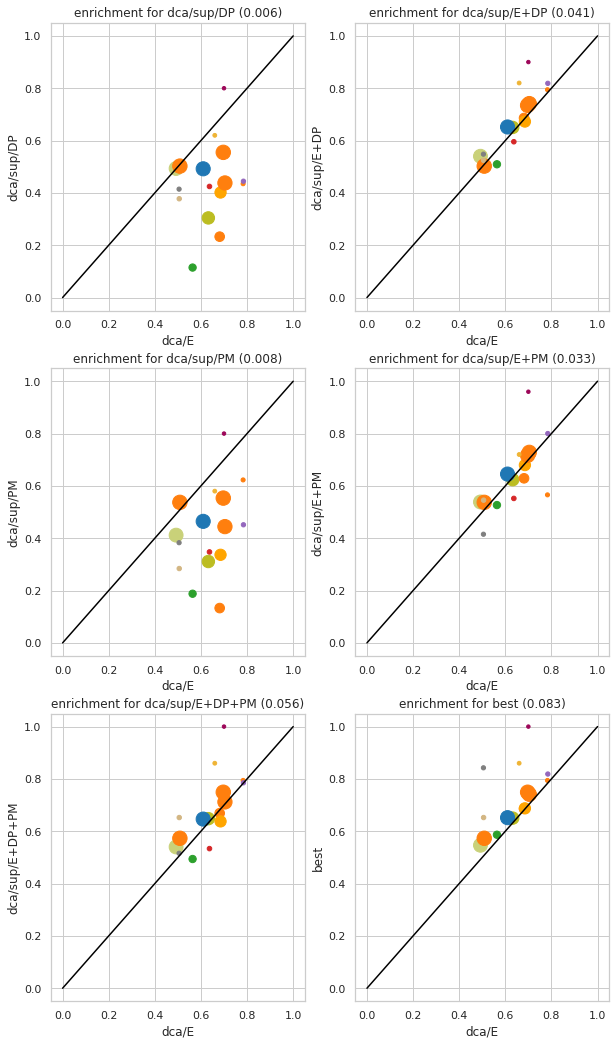

In [267]:
plt.figure(figsize = (10,18))

plt.subplot(3,2,1)
plt.plot([0,1], c="black")
plt.scatter(rho_df2["dca/E"], rho_df2["dca/sup/DP"], c = rho_df2.fam.apply(lambda x : color[x]).values, 
            s = 3*np.sqrt(rho_df2["size"]), 
            marker = "o")
plt.xlabel("dca/E")
plt.ylabel("dca/sup/DP")
plt.title(f'enrichment for dca/sup/DP ({(rho_df2["dca/sup/DP"]-rho_df2["dca/E"]).clip(0,1).mean():.3f})')

plt.subplot(3,2,2)
plt.plot([0,1], c="black")
plt.scatter(rho_df2["dca/E"], rho_df2["dca/sup/E+DP"], c = rho_df2.fam.apply(lambda x : color[x]).values, 
            s = 3*np.sqrt(rho_df2["size"]), 
            marker = "o")
plt.xlabel("dca/E")
plt.ylabel("dca/sup/E+DP")
plt.title(f'enrichment for dca/sup/E+DP ({(rho_df2["dca/sup/E+DP"]-rho_df2["dca/E"]).clip(0,1).mean():.3f})')

plt.subplot(3,2,3)
plt.plot([0,1], c="black")
plt.scatter(rho_df2["dca/E"], rho_df2["dca/sup/PM"], c = rho_df2.fam.apply(lambda x : color[x]).values, 
            s = 3*np.sqrt(rho_df2["size"]), 
            marker = "o")
plt.xlabel("dca/E")
plt.ylabel("dca/sup/PM")
plt.title(f'enrichment for dca/sup/PM ({(rho_df2["dca/sup/PM"]-rho_df2["dca/E"]).clip(0,1).mean():.3f})')

plt.subplot(3,2,4)
plt.plot([0,1], c="black")
plt.scatter(rho_df2["dca/E"], rho_df2["dca/sup/E+PM"], c = rho_df2.fam.apply(lambda x : color[x]).values, 
            s = 3*np.sqrt(rho_df2["size"]), 
            marker = "o")
plt.xlabel("dca/E")
plt.ylabel("dca/sup/E+PM")
plt.title(f'enrichment for dca/sup/E+PM ({(rho_df2["dca/sup/E+PM"]-rho_df2["dca/E"]).clip(0,1).mean():.3f})')

plt.subplot(3,2,5)
plt.plot([0,1], c="black")
plt.scatter(rho_df2["dca/E"], rho_df2["dca/sup/E+DP+PM"], c = rho_df2.fam.apply(lambda x : color[x]).values, 
            s = 3*np.sqrt(rho_df2["size"]), 
            marker = "o")
plt.xlabel("dca/E")
plt.ylabel("dca/sup/E+DP+PM")
plt.title(f'enrichment for dca/sup/E+DP+PM ({(rho_df2["dca/sup/E+DP+PM"]-rho_df2["dca/E"]).clip(0,1).mean():.3f})')

plt.subplot(3,2, 6)
plt.plot([0,1], c="black")
plt.scatter(rho_df2["dca/E"], rho_df2["best"], c = rho_df2.fam.apply(lambda x : color[x]).values, 
            s = 3*np.sqrt(rho_df2["size"]), 
            marker = "o")
plt.xlabel("dca/E")
plt.ylabel("best")
plt.title(f'enrichment for best ({(rho_df2["best"]-rho_df2["dca/E"]).clip(0,1).mean():.3f})')


plt.show()

In [129]:
from sklearn.linear_model import HuberRegressor, LinearRegression, RANSACRegressor
from sklearn.metrics import r2_score

from scipy.stats import spearmanr, pearsonr

In [148]:
print(pearsonr(y, X[:,0]))

(0.22846582483749392, 0.16183419136585397)


(0.20677290998432557, 0.08825366042575877)


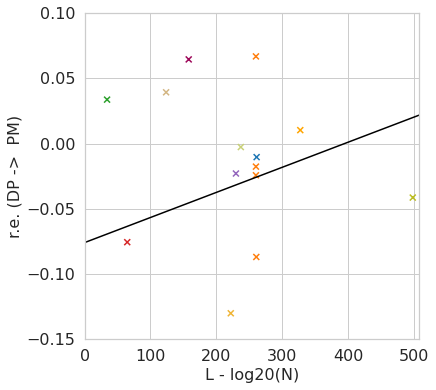

In [307]:
clf = HuberRegressor()

plt.figure(figsize = (6, 6))
X = rho_df["length"].values[:,None] - (np.log(0.8*rho_df["size"].values[:,None])/np.log(20))
X2 = rho_df2["length"].values[:,None] - (np.log(0.8*rho_df2["size"].values[:,None])/np.log(20))
m,M = 0,max(X)+10

y = np.log(rho_df["dca/sup/E+PM"]/rho_df["dca/sup/E+DP"])
y2 = np.log(rho_df2["dca/sup/E+PM"]/rho_df2["dca/sup/E+DP"])
#y = np.exp(y)
#y2 = np.exp(y2)

clf.fit(X,y)
print(pearsonr(y, clf.predict(X)))
x = np.linspace(0, 550, 100)[:,None]
plt.plot(x, clf.predict(x), c="black")
plt.scatter(X2, y2, color = rho_df2.fam.apply(lambda x : color[x]), 
            marker = "x")
plt.ylabel("r.e. (DP ->  PM)", fontsize = 16)
plt.xlabel("L - log20(N)", fontsize = 16)
plt.xlim(m,M)
plt.ylim(-0.15, 0.1)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

#plt.title(f"Score : {0:.3f} || Coefficient : {a[0]:.5f}, {c[0]:.3f} ")
plt.show()


(0.10314002992321045, 0.3990349390968968)


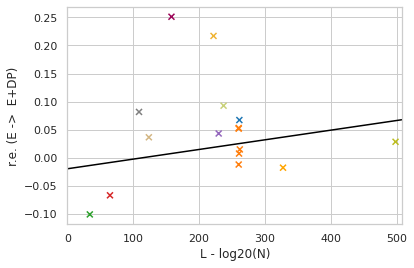

(0.2257912478771782, 0.06211585994686563)


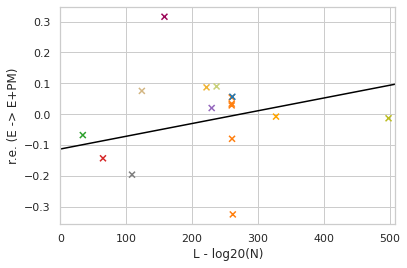

(-0.03311464107435831, 0.7870681589905152)


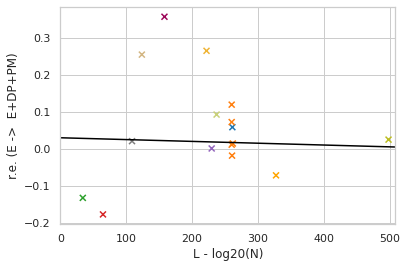

In [292]:
rho_df = rho_df.dropna()
rho_df2 = rho_df2.dropna()

X = rho_df["length"].values[:,None] - (np.log(0.8*rho_df["size"].values[:,None])/np.log(20))
X2 = rho_df2["length"].values[:,None] - (np.log(0.8*rho_df2["size"].values[:,None])/np.log(20))
m,M = 0,max(X)+10
x = np.linspace(m,M,100)

clf = HuberRegressor()
y = np.log(rho_df["dca/sup/E+DP"]/rho_df["dca/E"])
y2 =  np.log(rho_df2["dca/sup/E+DP"]/rho_df2["dca/E"])
clf.fit(X,y)
print(pearsonr(y, clf.predict(X)))
a, c = clf.coef_[0][None], clf.intercept_[None]
plt.plot(x, a*x+c, c="black")
plt.scatter(X2, y2, color = rho_df2.fam.apply(lambda x : color[x]), 
            marker = "x")
plt.ylabel("r.e. (E ->  E+DP)")
plt.xlabel("L - log20(N)")
plt.xlim(m,M)
plt.show()

clf = HuberRegressor()
y = np.log(rho_df["dca/sup/E+PM"]/rho_df["dca/E"])
y2 = np.log(rho_df2["dca/sup/E+PM"]/rho_df2["dca/E"])

clf.fit(X,y)
print(pearsonr(y, clf.predict(X)))

a, c = clf.coef_[0][None], clf.intercept_[None]
plt.plot(x, a*x+c, c="black")
plt.scatter(X2, y2, color = rho_df2.fam.apply(lambda x : color[x]), 
            marker = "x")
plt.ylabel("r.e. (E -> E+PM)")
plt.xlabel("L - log20(N)")
plt.xlim(m,M)
plt.show()

clf = HuberRegressor()
y = np.log(rho_df["dca/sup/E+DP+PM"]/rho_df["dca/E"])
y2 = np.log(rho_df2["dca/sup/E+DP+PM"]/rho_df2["dca/E"])

clf.fit(X,y)
print(pearsonr(y, clf.predict(X)))

a, c = clf.coef_[0][None], clf.intercept_[None]
plt.plot(x, a*x+c, c="black")
plt.scatter(X2, y2, color = rho_df2.fam.apply(lambda x : color[x]), 
            marker = "x")
plt.ylabel("r.e. (E ->  E+DP+PM)")
plt.xlabel("L - log20(N)")
plt.xlim(m,M)
plt.show()


#plt.title(f"Score : {0:.3f} || Coefficient : {a[0]:.5f}, {c[0]:.3f} ")
plt.show()
